In [1]:
import pickle 
import os
from datetime import datetime,timezone,timedelta

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal

import data_filter as dafi
import data_process as dapr
import lib_plot

In [2]:
main_path_2 = os.path.abspath('../data/20221031/2/')
main_path_3 = os.path.abspath('../data/20221031/3/')
azimut_mask = [270,330]
elevation_mask = [3,30]
min_height = 2
max_height = 6
t_range = 30

ts_1031_2 = dapr.generate_timeseries(main_path_2, azimut_mask, elevation_mask, min_height, max_height, t_range)
ts_1031_3 = dapr.generate_timeseries(main_path_3, azimut_mask, elevation_mask, min_height, max_height, t_range)

100%|██████████| 29/29 [01:32<00:00,  3.19s/it]


'for timepoint in ts_dict[ele][t_range][2]:\n    res_ts_dict[ele][t_range][2][timepoint] = -(ts_dict[ele][t_range][2][timepoint]-mean_dict[ele][t_range][2])\nfor timepoint in ts_dict[ele][t_range][3]:\n    res_ts_dict[ele][t_range][3][timepoint] = -(ts_dict[ele][t_range][3][timepoint]-mean_dict[ele][t_range][3])'

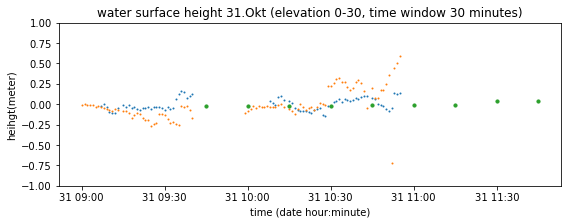

In [8]:
mean_ts_2 = np.mean(np.array(list(ts_1031_2.values())))
mean_ts_3 = np.mean(np.array(list(ts_1031_3.values())))

res_ts_1031_2 = np.array(list(ts_1031_2.values())) - mean_ts_2
res_ts_1031_3 = np.array(list(ts_1031_3.values())) - mean_ts_3

ts_gauge = pd.read_csv('20221031_gauge.csv')
gauge_time = []
gauge_mean = np.mean(ts_gauge['1'])
res_ts_gauge = []
for t,h in zip(ts_gauge['0'],ts_gauge['1']):
    gauge_time.append(datetime.fromtimestamp(t))
    res_ts_gauge.append(h-gauge_mean)

plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1031_2.keys()), res_ts_1031_2,s=1)
ax.scatter(list(ts_1031_3.keys()), res_ts_1031_3,s=1)
ax.scatter(gauge_time,res_ts_gauge,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('water surface height 31.Okt (elevation 0-30, time window 30 minutes)')
ax.set_ylim([-1,1])
fig.set_size_inches(9,3)